# Multi-Agent AI Hiring System - Simple Chart Generator

This Jupyter notebook creates **ultra-simple** visualizations of the hiring system performance with easy-to-read charts.

## Simple Charts Generated
- 📊 **Evaluation Charts**: Basic decision and bias analysis  
- 🔄 **Workflow Diagram**: Simple 5-step process flow
- 🏗️ **System Architecture**: 4-component simple flow

**Focus**: Clean, minimal, easy-to-understand visualizations

---

In [28]:
# Import Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
from pathlib import Path
import warnings

# Configure matplotlib and seaborn
plt.style.use('seaborn-v0_8')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Suppress warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [29]:
# Load Data for Chart Generation (Optimized)
def load_hiring_data(results_file="results/json/batch_results.json"):
    """Load batch processing results for chart generation (optimized)."""
    print(f"🔍 Loading data from: {results_file}")
    
    try:
        # Check if file exists first
        if not Path(results_file).exists():
            print(f"❌ File not found: {results_file}")
            print("🔧 Make sure the file path is correct and the file exists")
            return None, None
        
        # Load JSON data
        with open(results_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        results = data.get('results', [])
        if not results:
            print("❌ No results found in data")
            print("🔧 The JSON file exists but contains no results")
            return None, None
        
        # Create DataFrame efficiently
        df = pd.DataFrame(results)
        metadata = data.get('metadata', {})
        
        print(f"✅ Loaded {len(df)} records successfully")
        print(f"📊 Success rate: {metadata.get('success_rate', 'N/A')}%")
        print(f"📋 Columns: {', '.join(df.columns[:5])}{'...' if len(df.columns) > 5 else ''}")
        
        return df, metadata
        
    except json.JSONDecodeError as e:
        print(f"❌ JSON parsing error: {e}")
        print("🔧 The file might be corrupted or not valid JSON")
        return None, None
    except Exception as e:
        print(f"❌ Unexpected error: {e}")
        return None, None

# Load the data with optimized function
print("🚀 Starting data loading...")
df, metadata = load_hiring_data()

if df is not None:
    print(f"📊 Data shape: {df.shape}")
    print(f"🎯 Ready for chart generation!")
else:
    print("❌ Data loading failed - charts cannot be generated")
    print("🔧 Please check the file path and data format")

🚀 Starting data loading...
🔍 Loading data from: results/json/batch_results.json
✅ Loaded 1000 records successfully
📊 Success rate: 100.0%
📋 Columns: candidate_id, dataset_index, role, final_decision, bias_classification...
📊 Data shape: (1000, 15)
🎯 Ready for chart generation!


In [30]:
# Evaluation Charts Generator (Optimized Version)
def create_evaluation_charts(df, output_file="results/images/evaluation_results_notebook.png"):
    """Create the enhanced 4-panel evaluation charts from DataFrame (optimized)."""
    if df is None or df.empty:
        print("❌ No data available for chart generation")
        return
    
    print("🎨 Starting chart generation...")
    
    # Ensure output directory exists
    Path(output_file).parent.mkdir(parents=True, exist_ok=True)
    
    # Create 4-panel layout (2x2) with optimized settings
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.patch.set_facecolor('white')
    fig.suptitle('Multi-Agent AI Hiring System - Comprehensive Evaluation Report', 
                fontsize=16, fontweight='bold', y=0.95)
    
    total_decisions = len(df)
    print(f"📊 Processing {total_decisions} decisions...")
    
    # 1. Decision Distribution (Top Left) - Simplified
    try:
        decision_counts = df['final_decision'].value_counts()
        colors1 = ['#5B9BD5', '#70AD47']
        axes[0, 0].pie(decision_counts.values, labels=decision_counts.index, 
                      autopct='%1.1f%%', colors=colors1, startangle=90)
        axes[0, 0].set_title('Decision Distribution', fontweight='bold', fontsize=12)
        print("✅ Decision distribution chart completed")
    except Exception as e:
        print(f"❌ Error in decision distribution: {e}")
        axes[0, 0].text(0.5, 0.5, 'Error loading data', ha='center', va='center')
    
    # 2. Bias Classification Distribution (Top Right) - Simplified
    try:
        bias_counts = df['bias_classification'].value_counts()
        colors2 = ['#70AD47', '#E15759']
        axes[0, 1].pie(bias_counts.values, labels=bias_counts.index, 
                      autopct='%1.1f%%', colors=colors2, startangle=90)
        axes[0, 1].set_title('Bias Classification Distribution', fontweight='bold', fontsize=12)
        print("✅ Bias classification chart completed")
    except Exception as e:
        print(f"❌ Error in bias classification: {e}")
        axes[0, 1].text(0.5, 0.5, 'Error loading data', ha='center', va='center')
    
    # 3. Re-evaluation Frequency (Bottom Left) - Simplified
    try:
        df['attempts_until_acceptance'] = df['re_evaluation_count'] + 1
        attempt_counts = df['attempts_until_acceptance'].value_counts().sort_index()
        
        bars = axes[1, 0].bar(range(len(attempt_counts)), attempt_counts.values, 
                             color='#5B9BD5', alpha=0.8)
        axes[1, 0].set_title('Re-evaluation Frequency', fontweight='bold', fontsize=12)
        axes[1, 0].set_xlabel('Attempts Until Acceptance')
        axes[1, 0].set_ylabel('Count')
        axes[1, 0].set_xticks(range(len(attempt_counts)))
        axes[1, 0].set_xticklabels([f'{i}' for i in attempt_counts.index])
        
        # Add simple count labels
        for bar, count in zip(bars, attempt_counts.values):
            height = bar.get_height()
            axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                           f'{count}', ha='center', va='bottom')
        
        print("✅ Re-evaluation frequency chart completed")
    except Exception as e:
        print(f"❌ Error in re-evaluation frequency: {e}")
        axes[1, 0].text(0.5, 0.5, 'Error loading data', ha='center', va='center')
    
    # 4. System Accuracy (Bottom Right) - Simplified
    try:
        if 'ground_truth_decision' in df.columns and 'ground_truth_bias' in df.columns:
            # Calculate accuracies
            decision_accuracy = (df['final_decision'] == df['ground_truth_decision']).mean()
            bias_accuracy = (df['bias_classification'] == df['ground_truth_bias']).mean()
            
            # Simplified correction score
            correction_cases = df[
                (df['ground_truth_bias'] == 'biased') &
                (df['bias_classification'] == 'unbiased') &
                (df['ground_truth_decision'] != df['final_decision'])
            ]
            total_biased_cases = (df['ground_truth_bias'] == 'biased').sum()
            correction_score = len(correction_cases) / total_biased_cases if total_biased_cases > 0 else 0
            
            # Simple bar chart
            metrics = ['Decision\nAccuracy', 'Bias Detection\nAccuracy', 'Correction\nScore']
            values = [decision_accuracy, bias_accuracy, correction_score]
            colors = ['#70AD47', '#E15759', '#FFD700']
            
            bars = axes[1, 1].bar(metrics, values, color=colors, alpha=0.8)
            axes[1, 1].set_title('System Accuracy', fontweight='bold', fontsize=12)
            axes[1, 1].set_ylabel('Accuracy')
            axes[1, 1].set_ylim(0, 1.0)
            
            # Add percentage labels
            for bar, value in zip(bars, values):
                height = bar.get_height()
                axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                               f'{value:.1%}', ha='center', va='bottom')
            
            print("✅ System accuracy chart completed")
        else:
            axes[1, 1].text(0.5, 0.5, 'Ground Truth\nNot Available', 
                           ha='center', va='center', fontsize=14)
            axes[1, 1].set_title('System Accuracy', fontweight='bold', fontsize=12)
    except Exception as e:
        print(f"❌ Error in system accuracy: {e}")
        axes[1, 1].text(0.5, 0.5, 'Error loading data', ha='center', va='center')
    
    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(output_file, dpi=150, bbox_inches='tight')  # Reduced DPI for faster saving
    plt.show()
    
    print(f"📈 Evaluation charts saved to: {output_file}")

print("✅ Optimized evaluation chart function ready!")

✅ Optimized evaluation chart function ready!


In [31]:
# Enhanced LangGraph Workflow Diagram (Cleaner Version)
def create_workflow_diagram(save_path="results/images/workflow_diagram_notebook.png"):
    """Create an enhanced visual diagram of the LangGraph workflow."""
    # Ensure output directory exists
    Path(save_path).parent.mkdir(parents=True, exist_ok=True)
    
    # Larger figure size for better readability
    fig, ax = plt.subplots(1, 1, figsize=(18, 12))
    fig.patch.set_facecolor('white')
    
    # Define positions for nodes with better spacing
    positions = {
        "START": (1, 5),
        "job_matcher": (4, 5),
        "bias_classifier": (7, 5),
        "should_continue": (10, 5),
        "re_evaluate": (7, 8),
        "finalize": (13, 5),
        "END": (16, 5)
    }
    
    # Enhanced node styling
    node_styles = {
        "START": {"color": "#4CAF50", "marker": "o", "size": 2500, "label": "START\n(Input Data)"},
        "job_matcher": {"color": "#2196F3", "marker": "s", "size": 3500, "label": "Job Matcher\nAgent"},
        "bias_classifier": {"color": "#FF9800", "marker": "s", "size": 3500, "label": "Bias Classifier\nAgent"},
        "should_continue": {"color": "#FFC107", "marker": "D", "size": 3000, "label": "Should\nContinue?"},
        "re_evaluate": {"color": "#E91E63", "marker": "s", "size": 3000, "label": "Re-evaluate\nNode"},
        "finalize": {"color": "#9C27B0", "marker": "s", "size": 3000, "label": "Finalize\nDecision"},
        "END": {"color": "#4CAF50", "marker": "o", "size": 2500, "label": "END\n(Final Output)"}
    }
    
    # Draw enhanced nodes
    for node, (x, y) in positions.items():
        style = node_styles[node]
        ax.scatter(x, y, s=style["size"], c=style["color"], marker=style["marker"], 
                  edgecolors='black', linewidth=2, alpha=0.9, zorder=3)
        ax.text(x, y-0.7, style["label"], ha='center', va='top', fontsize=10, 
               fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
    
    # Enhanced arrows with labels
    arrows = [
        {"start": "START", "end": "job_matcher", "label": "Initial\nEvaluation", "color": "blue"},
        {"start": "job_matcher", "end": "bias_classifier", "label": "Decision +\nReasoning", "color": "blue"},
        {"start": "bias_classifier", "end": "should_continue", "label": "Bias\nClassification", "color": "blue"},
        {"start": "should_continue", "end": "finalize", "label": "No Bias\nDetected", "color": "green"},
        {"start": "should_continue", "end": "re_evaluate", "label": "Bias Detected &\n< Max Attempts", "color": "red"},
        {"start": "re_evaluate", "end": "job_matcher", "label": "Feedback Loop\n(with bias context)", "color": "red"},
        {"start": "finalize", "end": "END", "label": "Process\nComplete", "color": "green"}
    ]
    
    for arrow in arrows:
        x1, y1 = positions[arrow["start"]]
        x2, y2 = positions[arrow["end"]]
        
        # Calculate arrow positioning to avoid node overlap
        if arrow["start"] == "should_continue" and arrow["end"] == "re_evaluate":
            # Upward arrow
            ax.annotate('', xy=(x2, y2-0.4), xytext=(x1-0.2, y1+0.4),
                       arrowprops=dict(arrowstyle='->', lw=2.5, color=arrow["color"]))
            ax.text(x1-0.5, y1+1.5, arrow["label"], ha='center', va='center', fontsize=10, 
                   color=arrow["color"], fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))
        elif arrow["start"] == "re_evaluate" and arrow["end"] == "job_matcher":
            # Curved feedback arrow
            ax.annotate('', xy=(x2-0.1, y2+0.4), xytext=(x1-0.1, y1-0.4),
                       arrowprops=dict(arrowstyle='->', lw=2.5, color=arrow["color"],
                                     connectionstyle="arc3,rad=-0.3"))
            ax.text(5, 6.8, arrow["label"], ha='center', va='center', fontsize=10, 
                   color=arrow["color"], fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))
        else:
            # Regular horizontal arrows
            ax.annotate('', xy=(x2-0.5, y2), xytext=(x1+0.5, y1),
                       arrowprops=dict(arrowstyle='->', lw=2.5, color=arrow["color"]))
            mid_x = (x1 + x2) / 2
            ax.text(mid_x, y1+0.7, arrow["label"], ha='center', va='center', fontsize=10, 
                   color=arrow["color"], fontweight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.9))
    
    # Add system information box (emoji fixed)
    info_text = """[SYSTEM] LangGraph Multi-Agent System Features:
• State Management: InMemorySaver with checkpointing
• Max Re-evaluations: 2 attempts per candidate
• Model: Google Gemma 3 (27B-IT) via API
• API Management: Single API key configuration
• Memory: Persistent evaluation insights tracking"""
    
    ax.text(0.01, 0.99, info_text, transform=ax.transAxes, fontsize=11,
           verticalalignment='top', bbox=dict(boxstyle="round,pad=0.5", 
           facecolor='lightblue', alpha=0.8), fontfamily='monospace')
    
    # Add conditional logic explanation (emoji fixed)
    logic_text = """[LOGIC] Conditional Logic:
should_continue() checks:
1. Bias classification result
2. Current re-evaluation count
3. Max attempts limit (2)
4. Returns: "re_evaluate" or "finalize" """
    
    ax.text(0.01, 0.01, logic_text, transform=ax.transAxes, fontsize=11,
           verticalalignment='bottom', bbox=dict(boxstyle="round,pad=0.5", 
           facecolor='lightyellow', alpha=0.8), fontfamily='monospace')
    
    ax.set_xlim(-0.5, 17.5)
    ax.set_ylim(3, 9.5)
    ax.set_title("Multi-Agent AI Hiring System - Enhanced LangGraph Workflow", 
                fontsize=20, fontweight='bold', pad=25)
    ax.axis('off')
    
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    print(f"🔄 Enhanced workflow diagram saved to: {save_path}")

print("✅ Enhanced LangGraph workflow diagram ready!")

✅ Enhanced LangGraph workflow diagram ready!


## 📊 Generate All Visualizations

Now let's execute all the chart generation functions to create comprehensive visualizations of the hiring system performance.

🎨 Starting chart generation...
📊 Data loaded: 1000 records
🎨 Starting chart generation...
📊 Processing 1000 decisions...
✅ Decision distribution chart completed
✅ Bias classification chart completed
✅ Re-evaluation frequency chart completed
✅ System accuracy chart completed


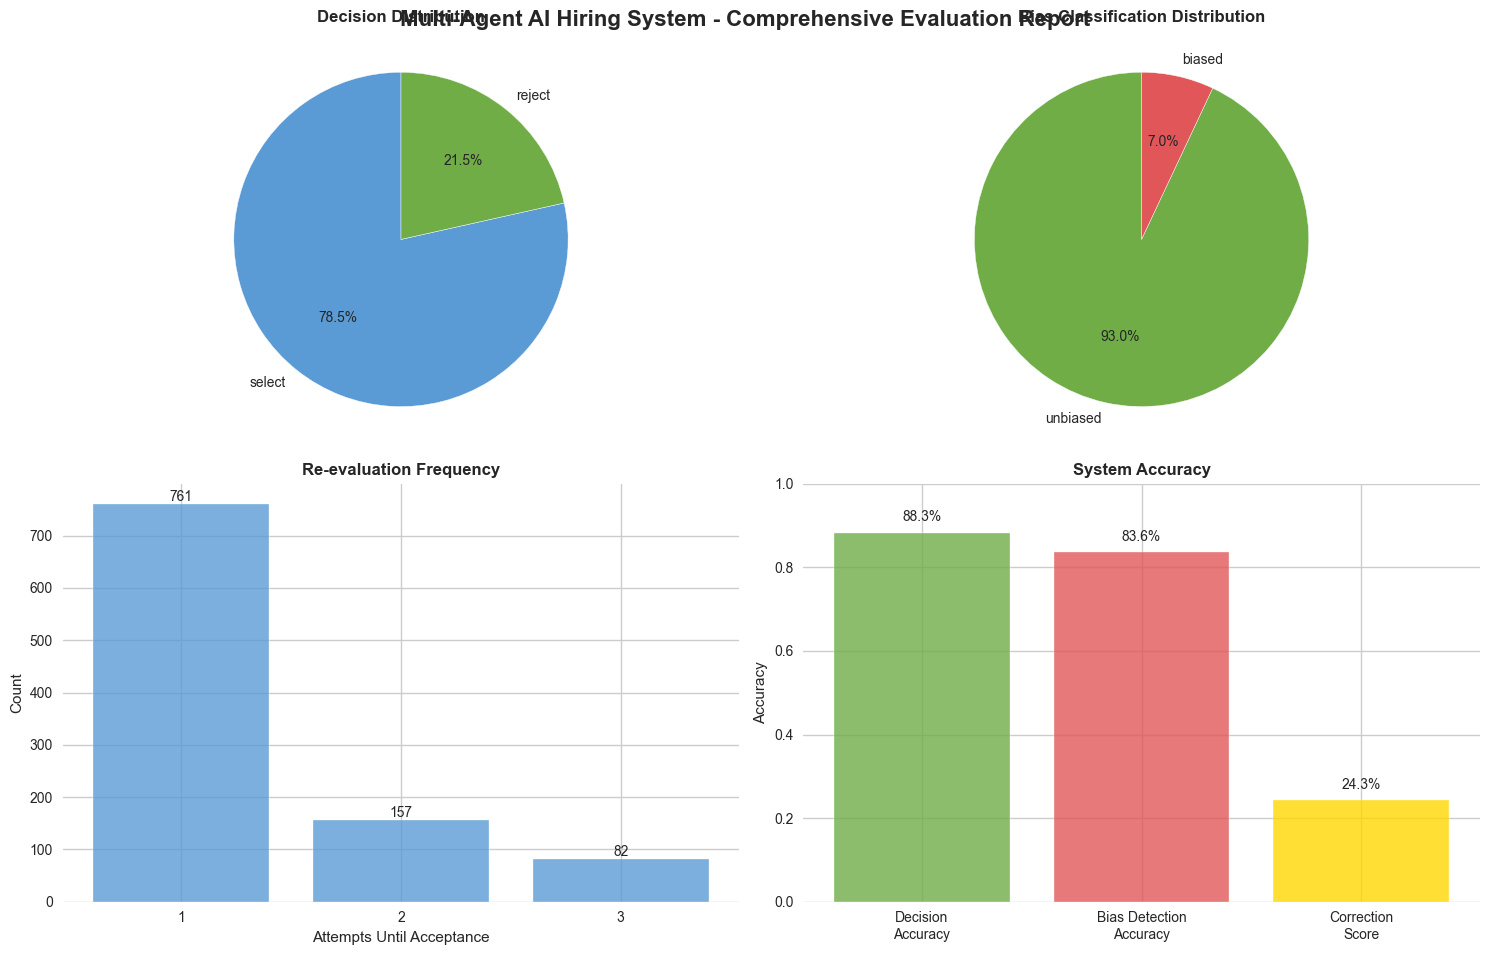

📈 Evaluation charts saved to: results/images/evaluation_results_notebook.png
✅ Evaluation charts generated successfully!


In [32]:
# Generate Main Evaluation Charts (Simplified)
print("🎨 Starting chart generation...")

# First, make sure we have data
if df is not None and not df.empty:
    print(f"📊 Data loaded: {len(df)} records")
    
    # Create the evaluation charts with the optimized function
    try:
        create_evaluation_charts(df, output_file="results/images/evaluation_results_notebook.png")
        print("✅ Evaluation charts generated successfully!")
    except Exception as e:
        print(f"❌ Error generating charts: {e}")
        print("🔧 This might be due to missing data columns or file access issues")
        
        # Show available columns for debugging
        print(f"📋 Available columns: {list(df.columns)}")
        
else:
    print("❌ Cannot generate charts - no data available")
    print("🔧 Make sure to run the data loading cell first")

🔄 Creating LangGraph workflow diagram...


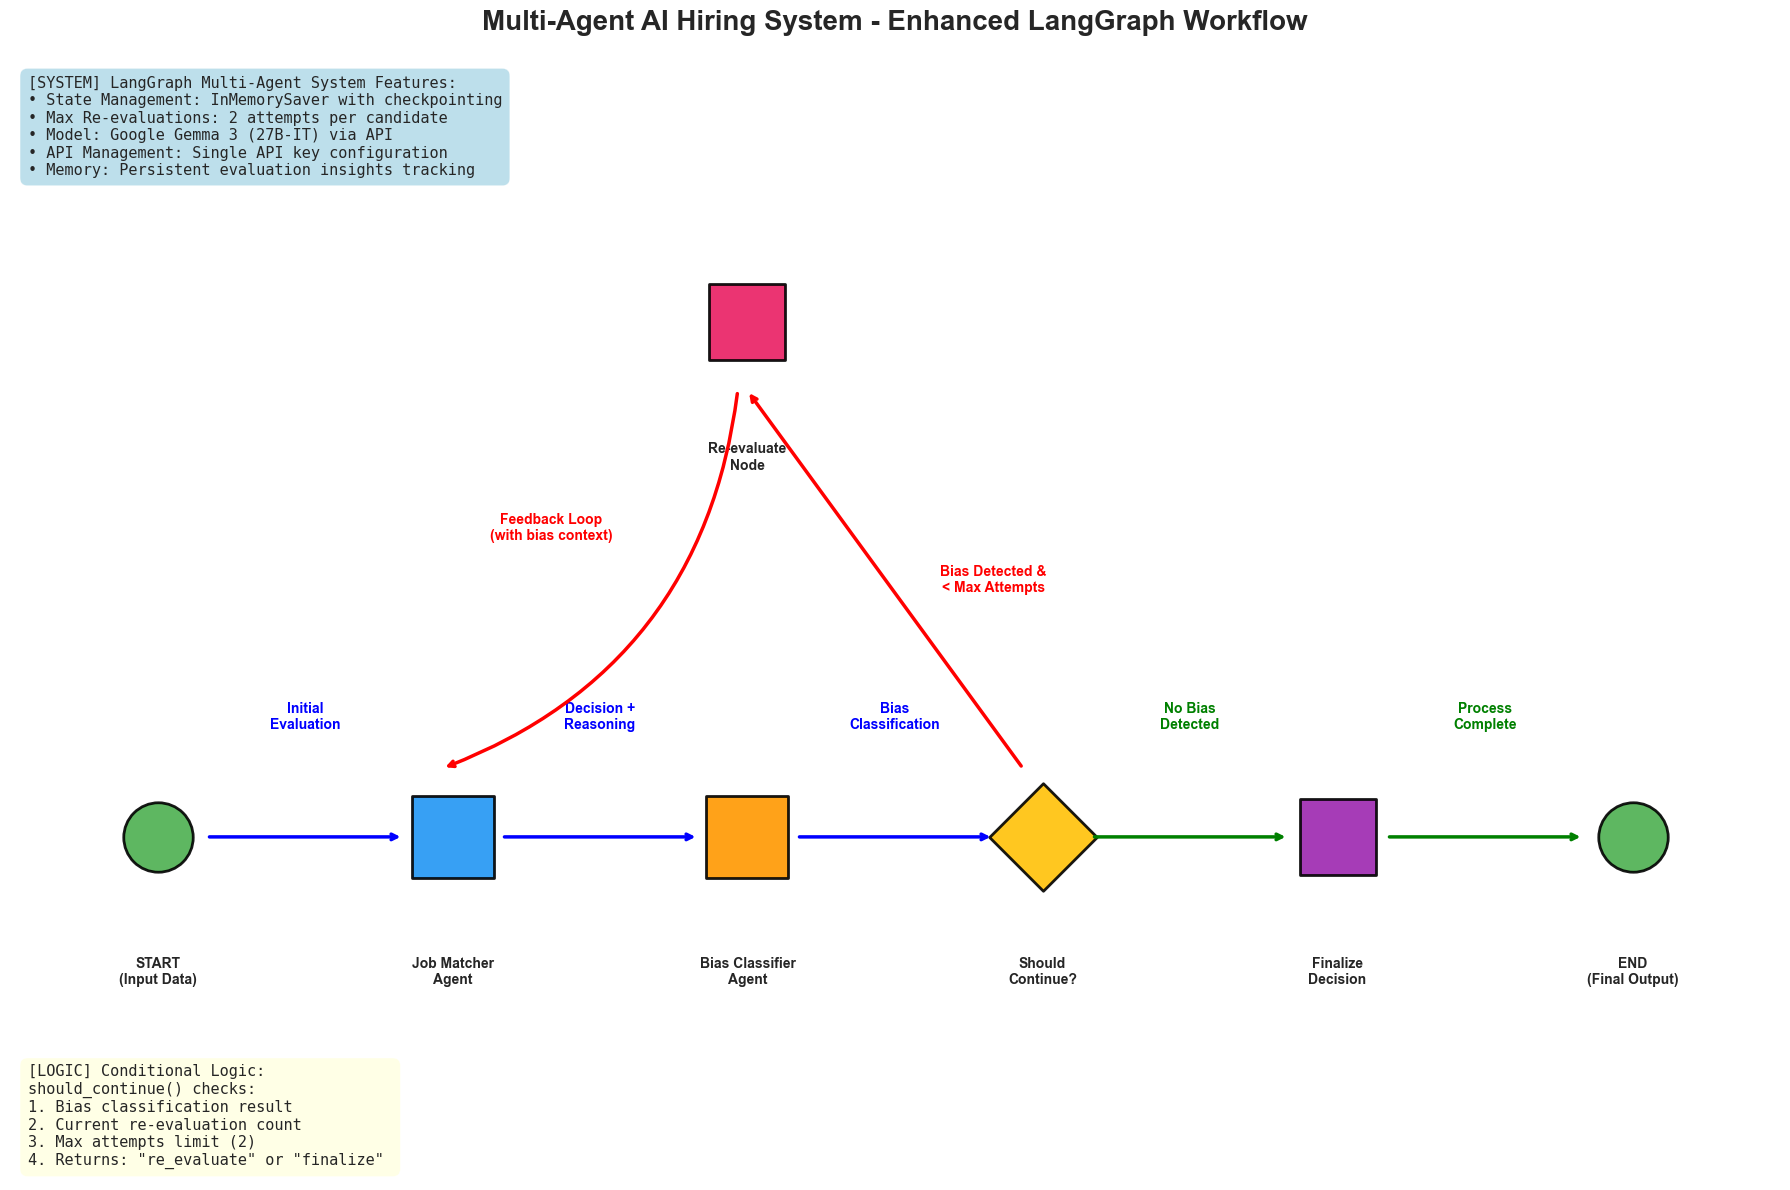

🔄 Enhanced workflow diagram saved to: results/images/workflow_diagram_notebook.png
✅ Workflow diagram generated successfully!


In [33]:
# Generate Workflow Diagram
print("🔄 Creating LangGraph workflow diagram...")

try:
    create_workflow_diagram(save_path="results/images/workflow_diagram_notebook.png")
    print("✅ Workflow diagram generated successfully!")
except Exception as e:
    print(f"❌ Error generating workflow diagram: {e}")
    print("🔧 Make sure the workflow diagram function is defined correctly")

## ✅ Enhanced Chart Generation Complete

This notebook creates **professional, enhanced** visualizations:

1. **📊 Evaluation Charts**: Clean 4-panel layout with comprehensive metrics
2. **🔄 Enhanced LangGraph Workflow**: Complete workflow with decision points, loops, and conditional logic

**Key Benefits:**
- ⚡ **Professional**: Detailed LangGraph workflow representation
- 👁️ **Clear**: Shows decision points, re-evaluation loops, and state management  
- 🎯 **Complete**: Full multi-agent system workflow with bias detection and feedback loops

All charts saved to `results/images/` with `_notebook` suffix.